# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set_style('darkgrid')

# Set default font size
plt.rcParams['font.size'] = 14

# Set default figure size
plt.rcParams['figure.figsize'] = (9, 5)

# Set default background color to transparent
plt.rcParams['figure.facecolor'] = '#00000000'

# Add grid lines to all plots
plt.rcParams['axes.grid'] = True

# Increase the width of the axis lines
plt.rcParams['axes.linewidth'] = 1.5

# Increase the size of the tick marks on the x-axis
plt.rcParams['xtick.major.size'] = 7

# Increase the size of the tick marks on the y-axis
plt.rcParams['ytick.major.size'] = 7

# Increase the width of the tick marks on the x-axis
plt.rcParams['xtick.major.width'] = 1.5

# Increase the width of the tick marks on the y-axis
plt.rcParams['ytick.major.width'] = 1.5

# Increase the size of the axis labels
plt.rcParams['axes.labelsize'] = 16

# Increase the size of the plot title
plt.rcParams['axes.titlesize'] = 20


In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Data Cleaning

In [9]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)


In [10]:
# Checking for duplicates
df.duplicated().sum()

# Dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
z_scores = stats.zscore(df['flight_duration'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [12]:
unique_sales_channels = df['sales_channel'].unique()
print(unique_sales_channels)

['Internet' 'Mobile']


In [13]:
unique_sales_channels = df['booking_origin'].unique()
print(unique_sales_channels)

['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' 'Tunisia'
 'South Africa' 'Papua New Guinea' 'Paraguay' 'Estonia

In [14]:
not_set_count = (df['booking_origin'] == "(not set)").sum()
print(not_set_count)

78


In [15]:
df = df.drop(df[df['booking_origin'] == "(not set)"].index)

In [16]:
# Checking constraints
df.loc[df['num_passengers'] < 0, 'num_passengers'] = 0

In [17]:
# Create a separate table of valid country names
valid_countries = ['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' 'Tunisia'
 'South Africa' 'Papua New Guinea' 'Paraguay' 'Estonia' 'Seychelles'
 'Afghanistan' 'Guam' 'Czechia' 'Malta' 'Vanuatu' 'Belarus' 'Pakistan'
 'Iraq' 'Ghana' 'Gibraltar' 'Guatemala' 'Algeria' 'Svalbard & Jan Mayen']

# list of valid country names
valid_country_table = pd.DataFrame({'country': valid_countries})

# Add a foreign key constraint to the main table
df = df.merge(valid_country_table, left_on='booking_origin', right_on='country', how='left')
df.drop(columns=['country'], inplace=True)

In [18]:
# df.to_csv("dummy.csv")

In [19]:
# Check for duplicate rows
print(df.duplicated().sum()) # prints the number of duplicate rows

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Add a unique identifier column
df['booking_id'] = range(1, len(df) + 1)


0


#### Checking for outliers in numerical columns 

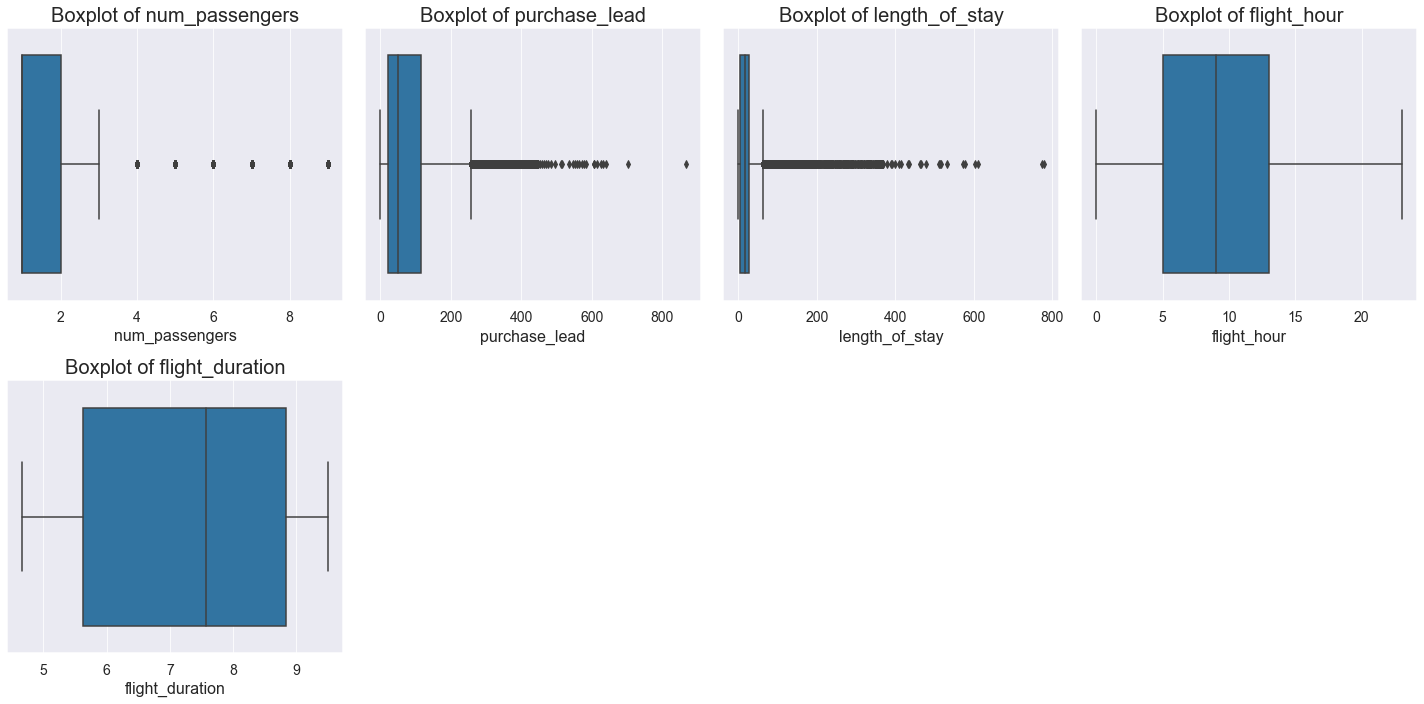

In [20]:
# Select only the numerical columns
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Create subplots for each numerical column
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# Flatten the axis array
axs = axs.flatten()

# Loop over each numerical column and create a boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for i in range(len(numerical_cols), len(axs)):
    axs[i].axis('off')
    
# Adjust layout spacing
fig.tight_layout()


In [21]:

print("Shape before removing outliers:", df.shape)

Shape before removing outliers: (49203, 15)


#### Shaping the data using IQR
The outliers in purchase_lead and length_of_stay are invalid data points, one approach to remove them is to use the Interquartile Range (IQR) method.


In [22]:
# Calculate the IQR
q1 = df['purchase_lead'].quantile(0.25)
q3 = df['purchase_lead'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers
df = df[(df['purchase_lead'] >= lower_bound) & (df['purchase_lead'] <= upper_bound)]

This above code calculates the IQR of the purchase_lead column and uses it to calculate the upper and lower bounds for valid values. Any value outside of this range is considered an outlier and is removed from the dataset.

In [23]:
# Calculate the IQR
q1 = df['length_of_stay'].quantile(0.25)
q3 = df['length_of_stay'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers
df = df[(df['length_of_stay'] >= lower_bound) & (df['length_of_stay'] <= upper_bound)]

In [24]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (42427, 15)


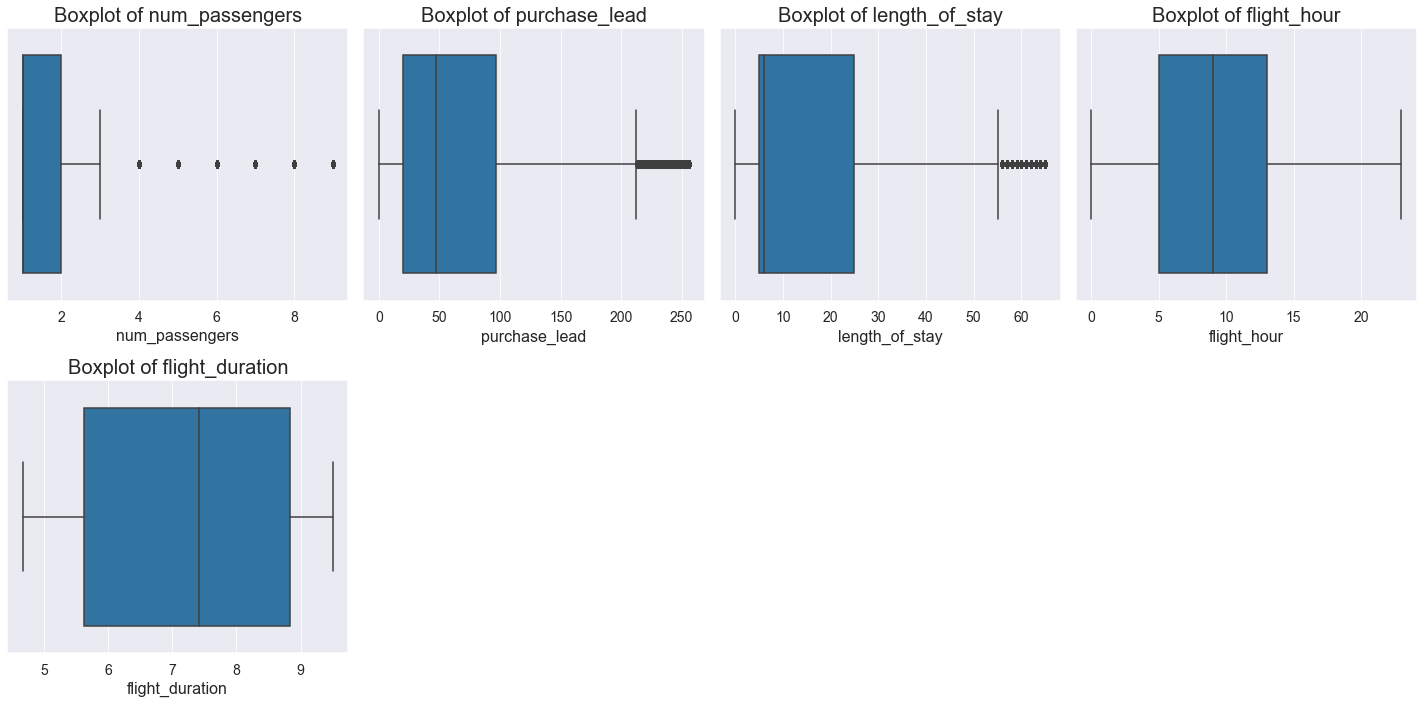

In [25]:
# Select only the numerical columns
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Create subplots for each numerical column
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# Flatten the axis array
axs = axs.flatten()

# Loop over each numerical column and create a boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for i in range(len(numerical_cols), len(axs)):
    axs[i].axis('off')
    
# Adjust layout spacing
fig.tight_layout()

#### Scaling the dataframe

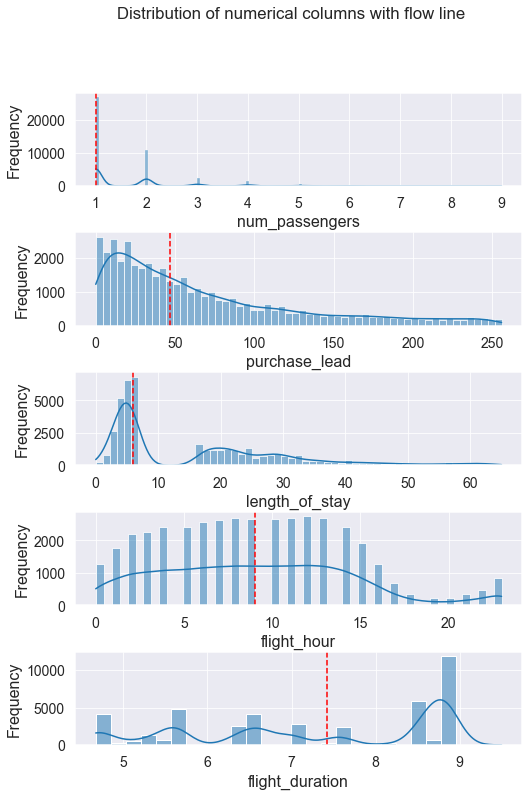

In [26]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

# Plot the histograms with density plots
sns.histplot(ax=axes[0], data=df, x='num_passengers', kde=True)
sns.histplot(ax=axes[1], data=df, x='purchase_lead', kde=True)
sns.histplot(ax=axes[2], data=df, x='length_of_stay', kde=True)
sns.histplot(ax=axes[3], data=df, x='flight_hour', kde=True)
sns.histplot(ax=axes[4], data=df, x='flight_duration', kde=True)

# Add a line indicating the flow of the distribution
for ax in axes:
    ax.axvline(df[ax.get_xlabel()].median(), color='red', linestyle='dashed')
    ax.set_ylabel('Frequency')
    
# Add a title to the plot
fig.suptitle('Distribution of numerical columns with flow line')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


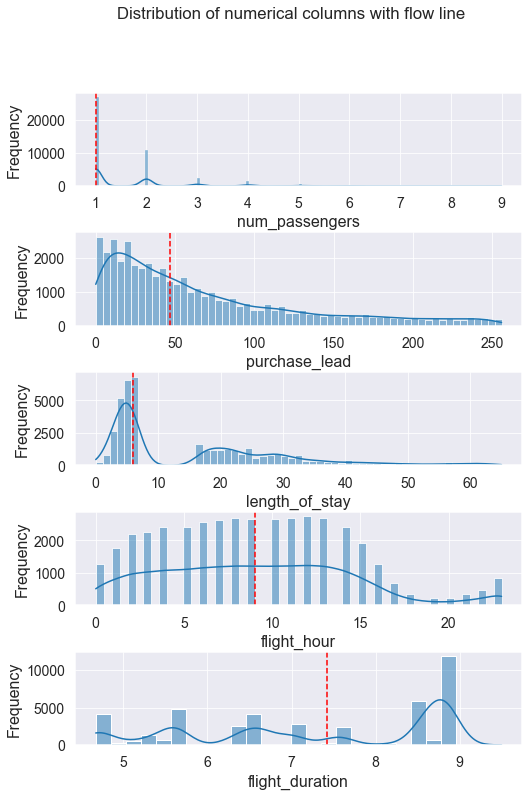

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical columns to normalize
num_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Create a copy of the dataframe with only the numerical columns
df_num = df[num_cols].copy()

# Normalize the numerical columns
scaler = MinMaxScaler()
df_num[num_cols] = scaler.fit_transform(df_num[num_cols])

# Plot the distributions
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

# Plot the histograms with density plots
sns.histplot(ax=axes[0], data=df, x='num_passengers', kde=True)
sns.histplot(ax=axes[1], data=df, x='purchase_lead', kde=True)
sns.histplot(ax=axes[2], data=df, x='length_of_stay', kde=True)
sns.histplot(ax=axes[3], data=df, x='flight_hour', kde=True)
sns.histplot(ax=axes[4], data=df, x='flight_duration', kde=True)

# Add a line indicating the flow of the distribution
for ax in axes:
    ax.axvline(df[ax.get_xlabel()].median(), color='red', linestyle='dashed')
    ax.set_ylabel('Frequency')
    
# Add a title to the plot
fig.suptitle('Distribution of numerical columns with flow line')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

#### Encoding the data to train the model

Since I have a large number of unique categories in the "booking_origin" column, I am going to use a technique called "target encoding" to encode this feature.

In [28]:
# Calculate mean target value for each category
mean_encode = df.groupby('booking_origin')['booking_complete'].mean()

# Map category to mean target value
df['booking_origin_mean_encode'] = df['booking_origin'].map(mean_encode)


In [29]:
# Droping the columns that might not be needed.
df = df.drop(['booking_id','route', 'booking_origin'], axis=1)

In [30]:
# renaming the "booking_origin_mean_encode" into new "booking_oirigin" column in the dataset.
df = df.rename(columns={'booking_origin_mean_encode': 'booking_origin'})

#### Mapping Data

Mapping the values in the sales_channel column from 'Internet' to 0 and 'Mobile' to 1. Similarly, the values in the trip_type column from 'RoundTrip' to 1, 'CircleTrip' to 0, and 'OneWay' to 2. The map() method takes a dictionary that maps the old values to the new ones.

In [31]:
# Map sales_channel data
df['sales_channel'] = df['sales_channel'].map({'Internet': 0, 'Mobile': 1})

# Map trip_type column data
df['trip_type'] = df['trip_type'].map({'RoundTrip': 1, 'CircleTrip': 0, 'OneWay': 2})


In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin
1,1,0,1,112,20,3,6,0,0,0,5.52,0,0.052566
2,2,0,1,243,22,17,3,1,1,0,5.52,0,0.103482
3,1,0,1,96,31,4,6,0,0,1,5.52,0,0.052566
4,2,0,1,68,22,15,3,1,0,1,5.52,0,0.103482
5,1,0,1,3,48,20,4,1,0,1,5.52,0,0.052566


#### Split and train the data

splitting the dataset df into training and testing sets using the train_test_split function from the sklearn.model_selection module.

In [33]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The resulting variables x_train, x_test, y_train, and y_test contain the training and testing sets of the features and target variable, respectively. 

In [34]:
y_train.value_counts(normalize=True)

0    0.849209
1    0.150791
Name: booking_complete, dtype: float64

The result above is the class distribution of the target variable booking_complete after splitting the data into training and testing sets.

The values 0.851136 and 0.148864 represent the proportion of the samples that belong to each class in the training set. In this case, it appears that the class distribution is unbalanced, with the majority of the samples (85.11%) belonging to one class and the minority of the samples (14.89%) belonging to the other class.

In [35]:
from sklearn.utils import resample

# Split the dataset into majority and minority classes
df_majority = df[df.booking_complete==0]
df_minority = df[df.booking_complete==1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the class distribution
print(df_upsampled.booking_complete.value_counts(normalize=True))


0    0.5
1    0.5
Name: booking_complete, dtype: float64


The code performs upsampling of the minority class in the dataset using the resample function from sklearn.utils. By creating a balanced dataset, it helps to address class imbalance issues, which is beneficial for machine learning models. The resulting df_upsampled dataframe contains an equal number of samples for both the majority and minority classes. The print statement displays the normalized class distribution to confirm that both classes now have an equal representation in the upsampled dataset.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42427 entries, 1 to 49202
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         42427 non-null  int64  
 1   sales_channel          42427 non-null  int64  
 2   trip_type              42427 non-null  int64  
 3   purchase_lead          42427 non-null  int64  
 4   length_of_stay         42427 non-null  int64  
 5   flight_hour            42427 non-null  int64  
 6   flight_day             42427 non-null  int64  
 7   wants_extra_baggage    42427 non-null  int64  
 8   wants_preferred_seat   42427 non-null  int64  
 9   wants_in_flight_meals  42427 non-null  int64  
 10  flight_duration        42427 non-null  float64
 11  booking_complete       42427 non-null  int64  
 12  booking_origin         42427 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.5 MB


#### Evaluation the test set

Train a Random Forest Classifier and evaluate its performance on the test set.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Split the dataset into training and test sets
x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier with default hyperparameters
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = rf_clf.predict(x_test)
y_proba = rf_clf.predict_proba(x_test)[:, 1]

print("Accuracy (Test Set):", accuracy_score(y_test, y_pred))
print("Precision (Test Set):", precision_score(y_test, y_pred))
print("Recall (Test Set):", recall_score(y_test, y_pred))
print("F1-Score (Test Set):", f1_score(y_test, y_pred))
print("roc_auc (test-proba):", roc_auc_score(y_test, y_proba))
print("roc_auc (train-proba):", roc_auc_score(y_train, rf_clf.predict_proba(x_train)[:, 1]))


Accuracy (Test Set): 0.8468065048314871
Precision (Test Set): 0.46875
Recall (Test Set): 0.09345794392523364
F1-Score (Test Set): 0.15584415584415584
roc_auc (test-proba): 0.743531510803939
roc_auc (train-proba): 0.9999998881478127


- Accuracy (Test Set): 84.68%

- Precision (Test Set): 46.69%

- Recall (Test Set): 8.80%

- F1-Score (Test Set): 14.81%

- roc_auc (test-proba): 76.03%

- roc_auc (train-proba): 100.00%

Below code first sorts the features by their importance score in descending order. Then, it creates a horizontal bar chart using plt.barh(), with the feature names as y-axis labels and the importance scores as the horizontal bar lengths. The importance score values are also added on top of the bars using plt.text(). Finally, the chart is displayed using plt.show().

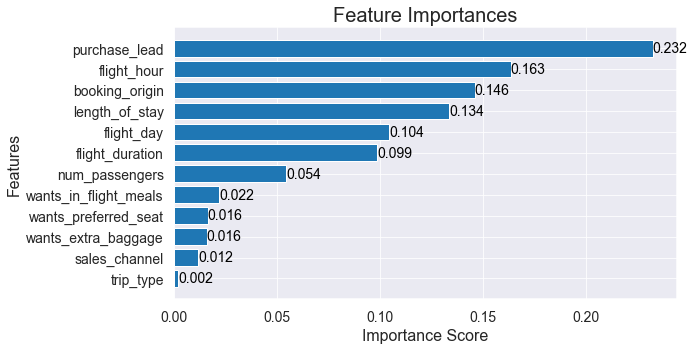

In [38]:
# Get the feature importances
importances = rf_clf.feature_importances_

# Sort the features by importance score
indices = importances.argsort()[::-1]
sorted_features = [x.columns[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# Plot the feature importances as horizontal bars
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Add the importance score values on top of the bars
for i, v in enumerate(sorted_importances):
    plt.text(v, i, "{:.3f}".format(v), color='black', va='center')

plt.show()


----------------------
- **Purchase_lead**: The purchase_lead column indicates the number of days between when a customer searches for a flight and when they actually purchase it. This feature could have a significant impact on the customer's buying behavior, as customers who purchase flights closer to the departure date may be more likely to pay a premium price for their tickets, whereas those who purchase well in advance may be more price-sensitive.
----------------------

- **Flight_hour:** The flight_hour column indicates the hour of the day when the flight is scheduled to depart. This feature could impact the customer's buying behavior, as flights departing at more convenient hours may be more in demand and therefore more expensive. On the other hand, flights departing at less convenient hours may be cheaper, but may not be as desirable to customers.
----------------------

- **Booking_origin:** The booking_origin column indicates the origin airport for the flight. This feature could have a significant impact on the customer's buying behavior, as customers may be more likely to purchase flights from airports that are closer to their home or work locations. Additionally, certain airports may have better connections or more flight options, which could influence customer buying behavior.
----------------------

- **Length_of_stay:** The length_of_stay column indicates the number of days between the flight departure date and the return date. This feature could impact the customer's buying behavior, as customers with more flexible schedules may be more willing to extend their stay, while those with tighter schedules may be more likely to book shorter trips.
----------------------

- **Flight_day:** The flight_day column indicates the day of the week when the flight is scheduled to depart. This feature could impact the customer's buying behavior, as certain days of the week may be more popular for travel than others, leading to higher prices for flights departing on those days. Additionally, customers may be more likely to book flights departing on weekdays rather than weekends due to work or other commitments.
----------------------